In [1]:
from sklearn.datasets import load_diabetes
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

In [2]:
# 载入数据
X, y = load_diabetes(return_X_y=True)
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)

dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [3]:
# 简单线性回归网络
model = nn.Linear(X.shape[1], 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)


In [4]:
losses = []
for epoch in range(50):
    total_loss = 0
    for xb, yb in loader:
        preds = model(xb)
        loss = criterion(preds, yb)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    losses.append(total_loss / len(loader))
    print(f"Epoch {epoch+1}, Loss: {total_loss / len(loader):.4f}")

Epoch 1, Loss: 29089.8669
Epoch 2, Loss: 28886.9061
Epoch 3, Loss: 28939.6469
Epoch 4, Loss: 28884.9554
Epoch 5, Loss: 28875.6793
Epoch 6, Loss: 28786.8288
Epoch 7, Loss: 28786.6759
Epoch 8, Loss: 28722.9895
Epoch 9, Loss: 28647.7665
Epoch 10, Loss: 28589.8499
Epoch 11, Loss: 28523.2105
Epoch 12, Loss: 28522.5067
Epoch 13, Loss: 28516.0167
Epoch 14, Loss: 28425.9255
Epoch 15, Loss: 28469.4468
Epoch 16, Loss: 28236.5889
Epoch 17, Loss: 28315.8262
Epoch 18, Loss: 28284.5707
Epoch 19, Loss: 28211.4840
Epoch 20, Loss: 28238.1629
Epoch 21, Loss: 28137.6635
Epoch 22, Loss: 28189.2574
Epoch 23, Loss: 28017.6747
Epoch 24, Loss: 28020.4492
Epoch 25, Loss: 27929.0116
Epoch 26, Loss: 27834.1085
Epoch 27, Loss: 27844.1635
Epoch 28, Loss: 27920.4321
Epoch 29, Loss: 27823.3221
Epoch 30, Loss: 27867.3538
Epoch 31, Loss: 27688.0271
Epoch 32, Loss: 27647.9965
Epoch 33, Loss: 27515.0926
Epoch 34, Loss: 27668.6466
Epoch 35, Loss: 27576.9153
Epoch 36, Loss: 27595.6486
Epoch 37, Loss: 27484.6218
Epoch 38, 

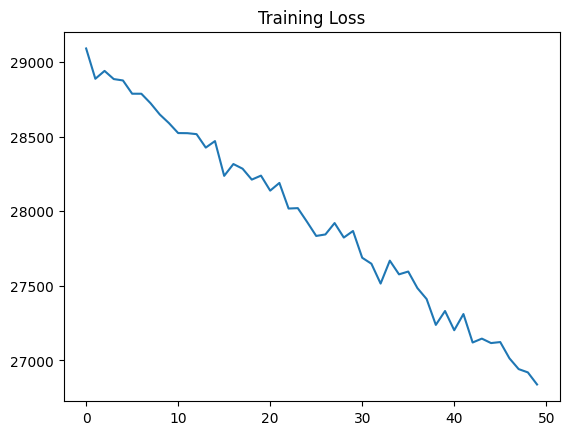

In [5]:
plt.plot(losses)
plt.title("Training Loss")
plt.show()

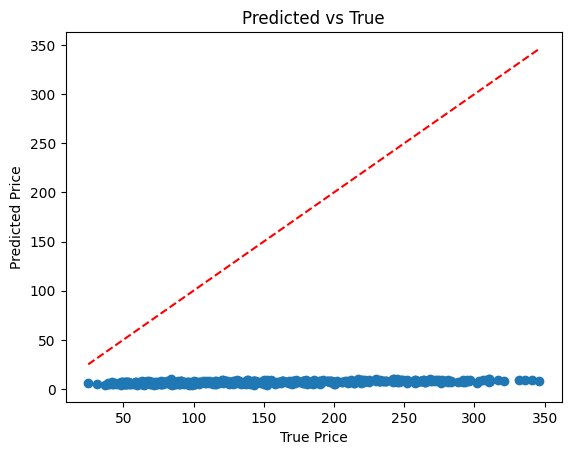

In [7]:
with torch.no_grad():
    preds = model(X).numpy()
    true = y.numpy()

import matplotlib.pyplot as plt

plt.scatter(true, preds)
plt.xlabel("True Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs True")
plt.plot([true.min(), true.max()], [true.min(), true.max()], 'r--')
plt.show()
